<a href="https://colab.research.google.com/github/LoowdY/previsao_fraude-cartao_credito/blob/main/fraude_cartao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [ ]:
#imports necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#Analisando Valores nulos e os retirando-o

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#Exploração de Dados


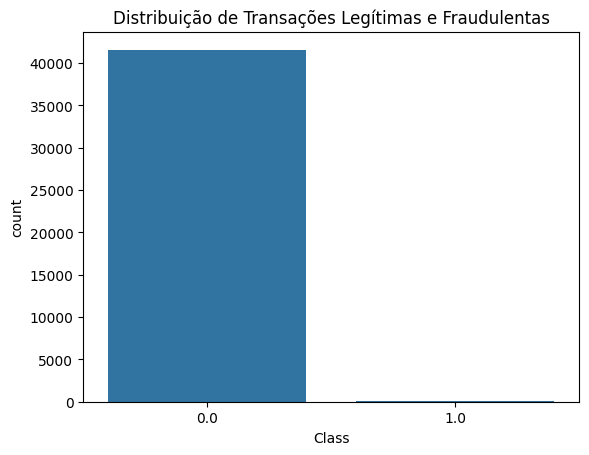

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Distribuição de Transações Legítimas e Fraudulentas')
plt.show()

Há uma pequena quantiadade de classe 1.0 (fraudulenta). Essa deve ser a previsão futura.

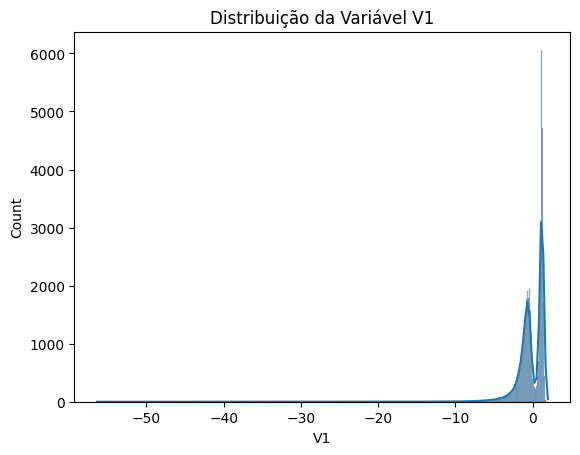

In [ ]:
sns.histplot(df['V1'], kde=True)
plt.title('Distribuição da Variável V1')
plt.show()


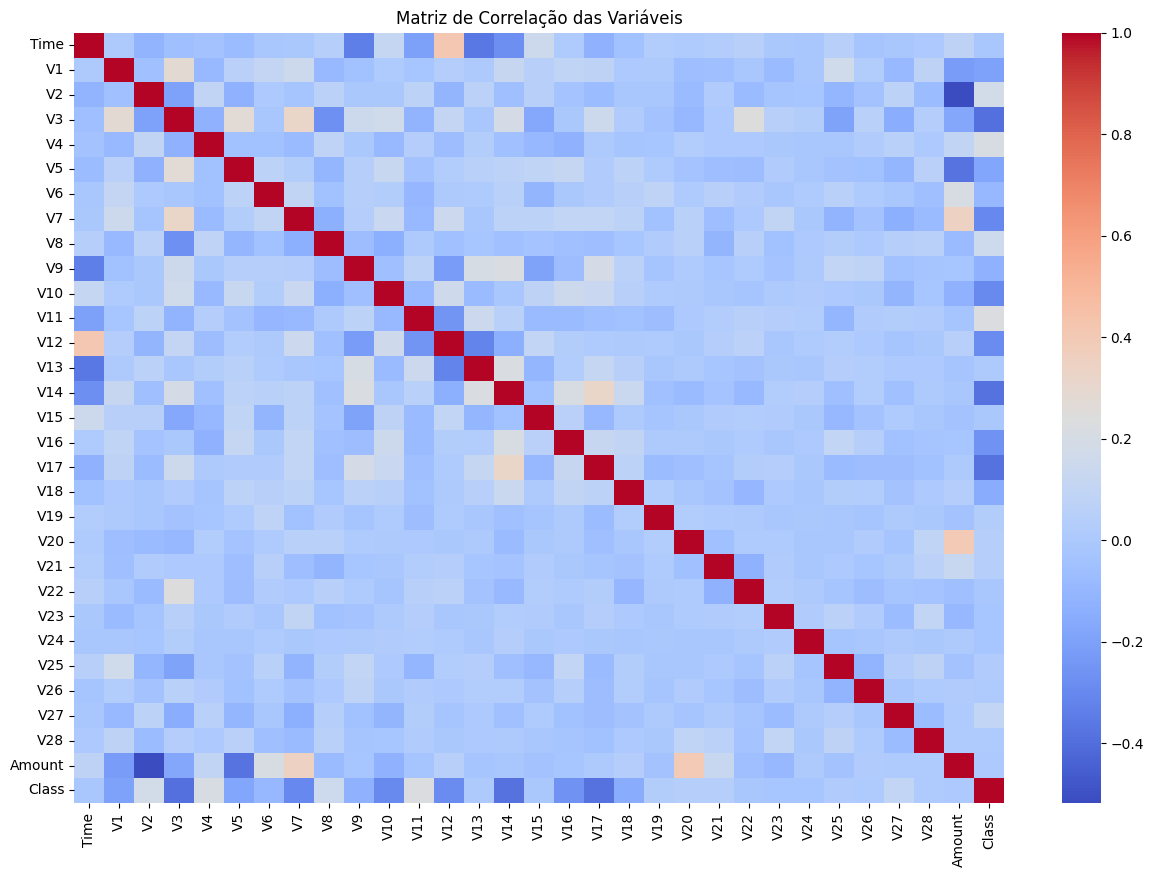

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Balanceamento de Classes


Como há poucas amostras para a classe 1.0 (fraude), deve-se aumentar a amostra a fim de ter u m treinamento de modelo de maior qualidade e acurária.

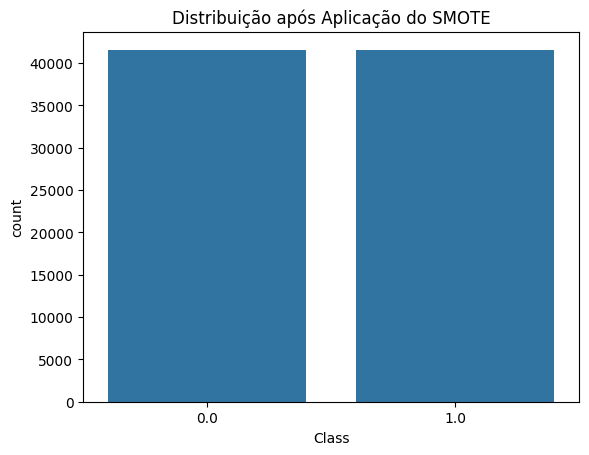

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.title('Distribuição após Aplicação do SMOTE')
plt.show()

#Modelagem pré-treinamento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Definição de algoritmo de Decision Tree e treinamento



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

[0. 1. 0. ... 1. 0. 1.]


#Avaliação - metrificação do modelo

In [ ]:
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12524
         1.0       1.00      1.00      1.00     12421

    accuracy                           1.00     24945
   macro avg       1.00      1.00      1.00     24945
weighted avg       1.00      1.00      1.00     24945



In [ ]:
y_pred_prob_dt = dt_model.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"AUC-ROC - Decision Tree: {roc_auc_dt}")

AUC-ROC - Decision Tree: 0.9987603898735182


In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


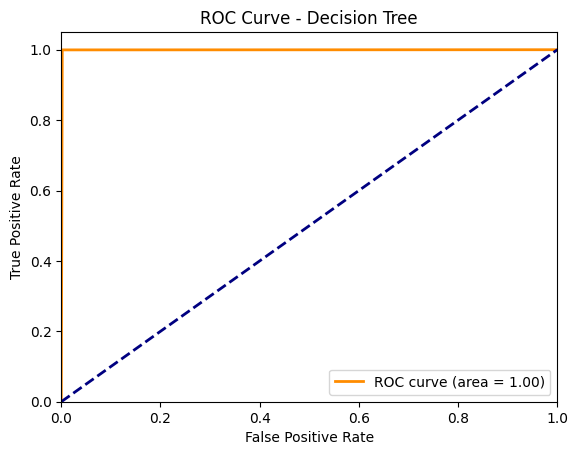

In [ ]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Definição de Random Forest e Treinamento do Modelo

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf  = dt_model.predict(X_test)

In [ ]:
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12524
         1.0       1.00      1.00      1.00     12421

    accuracy                           1.00     24945
   macro avg       1.00      1.00      1.00     24945
weighted avg       1.00      1.00      1.00     24945



In [ ]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC-ROC - Random Forest: {roc_auc_rf}")

AUC-ROC - Random Forest: 0.9999992253822825


In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

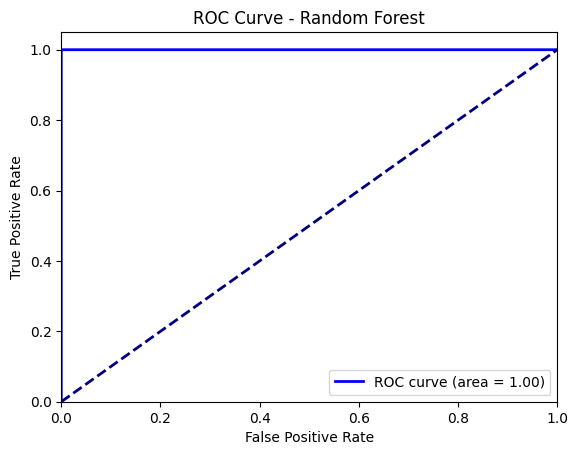

In [ ]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

#Regressão Logística

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Treinar o modelo
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = lr_model.predict(X_test)

In [ ]:
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     12524
         1.0       0.99      0.98      0.99     12421

    accuracy                           0.99     24945
   macro avg       0.99      0.99      0.99     24945
weighted avg       0.99      0.99      0.99     24945



In [ ]:
y_pred_prob_lr = lr_model.predict_proba(X_test)[:,1]
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(f"AUC-ROC - Logistic Regression: {roc_auc_lr}")

AUC-ROC - Logistic Regression: 0.9990755596449085


In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

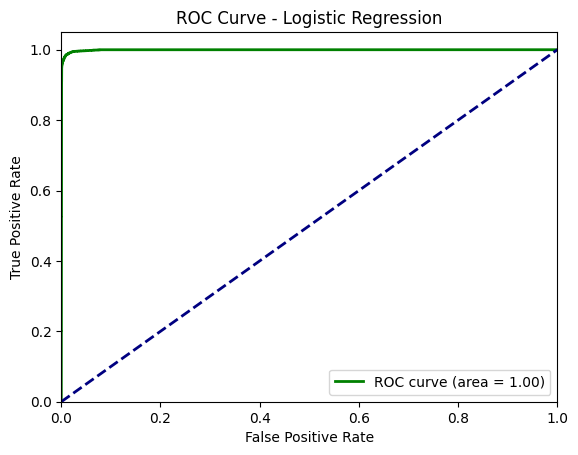

In [ ]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'ROC curve (area = {roc_auc_lr:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()
